In [1]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
import glob
import os

In [2]:
import pickle

def load(path):
    with open(path, 'rb') as handler:
        return pickle.load(handler)

In [3]:
def pure_filename(path):
    filedir, filename = os.path.split(path)
    basename, extension = os.path.splitext(filename)
    return basename

In [4]:
def show_image(image, title=''):
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(title)
    plt.show()

In [5]:
X = np.load('Data/x_test.npy') / 255
y = np.load('Data/y_test.npy')

In [6]:
ml_model_paths = glob.glob('models/*.h5')
nn_model_paths = glob.glob('models/*.keras')

In [7]:
ml_models = dict(zip(map(pure_filename, ml_model_paths), map(load, ml_model_paths)))
nn_models = dict(zip(map(pure_filename, nn_model_paths), map(load_model, nn_model_paths)))

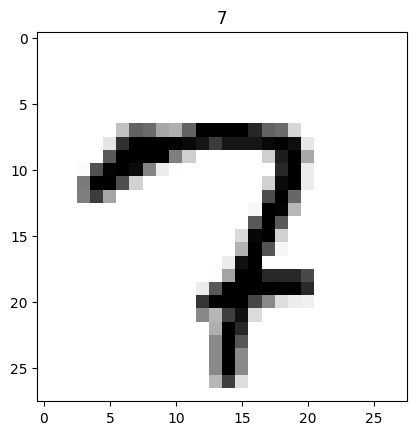

DecisionTreeClassifier: 7
KNeighborsClassifier: 7
RandomForestClassifier: 7
SVC: 7
CNN: 7
MLP: 7


In [8]:
idx = 36
image = X[idx]
show_image(image, title=y[idx])

image_ml = image.reshape(len(image)**2)
for name, model in ml_models.items():
    print(f"{name}: {model.predict([image_ml])[0]}")

image_nn = np.expand_dims(image, axis=0)
for name, model in nn_models.items():
    print(f"{name}: {np.argmax(model.predict(image_nn, verbose=0)[0])}")